# Advanced Regression Assignment

### Assignment Part-I
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Changing display parameters
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
#loading data into dataframe
df=pd.read_csv("train.csv")

In [4]:
#checking the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# shape of dataset
df.shape

(1460, 81)

In [6]:
# Information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# checking int value columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## EDA

In [8]:
#null percentage value of columns
null_perc=round(100 * (df.isnull().sum() / len(df.index)), 2)
null_perc[null_perc>0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

These columns have null values greater then 0

In [9]:
#setting the cut off as 70%
null_perc[null_perc>70]

Alley          93.77
PoolQC         99.52
Fence          80.75
MiscFeature    96.30
dtype: float64

In [10]:
#dropping columns with 70% null value
df=df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [11]:
#shape of new dataset after removing 
df.shape

(1460, 77)

In [12]:
null_perc[null_perc<70]

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

**Analysing FireplaceQu as it has highest null value percentage 47.26%**

In [13]:
# replacing na value who have no fireplace with no_place
df["FireplaceQu"]= df["FireplaceQu"].fillna("no_place")

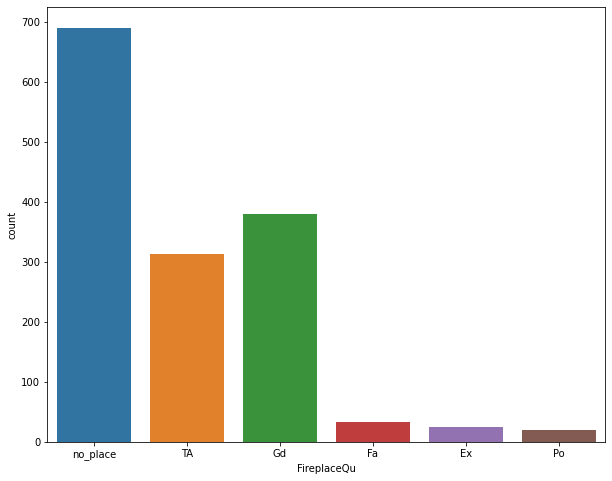

In [14]:
# plotting the column detail
plt.figure(figsize=(10,8))
sns.countplot(df["FireplaceQu"])
plt.show()

**Checking null values for lotFrontage**

In [15]:
df.LotFrontage.isna().sum()

259

In [16]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [17]:
#replacing null values of LotFrontage with mean value 70
df["LotFrontage"]= df["LotFrontage"].fillna(df["LotFrontage"].mean())

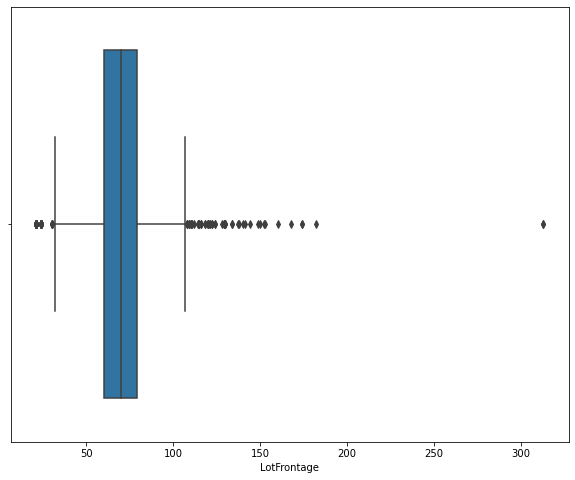

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(df["LotFrontage"])
plt.show()

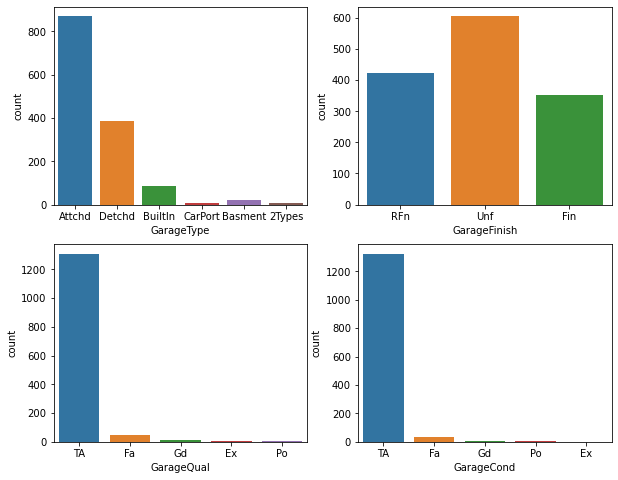

In [19]:
#plotting for columns GarageType,GarageFinish,GarageQual,GarageCond as they have 5.5% null values
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(df["GarageType"])
plt.subplot(2,2,2)
sns.countplot(df["GarageFinish"])
plt.subplot(2,2,3)
sns.countplot(df["GarageQual"])
plt.subplot(2,2,4)
sns.countplot(df["GarageCond"])
plt.show()

In [20]:
#replacing value with mode values of respective columns
df["GarageType"] = df["GarageType"].fillna("Attchd")
df["GarageFinish"] = df["GarageFinish"].fillna("Unf")
df["GarageQual"] = df["GarageQual"].fillna("TA")
df["GarageCond"] = df["GarageCond"].fillna("TA")

**checking for GarageYrBlt column**

In [21]:
df["GarageYrBlt"].value_counts().head()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
Name: GarageYrBlt, dtype: int64

In [22]:
#replacing null values with 2005 
df["GarageYrBlt"] = df["GarageYrBlt"].replace(np.NaN,2005)

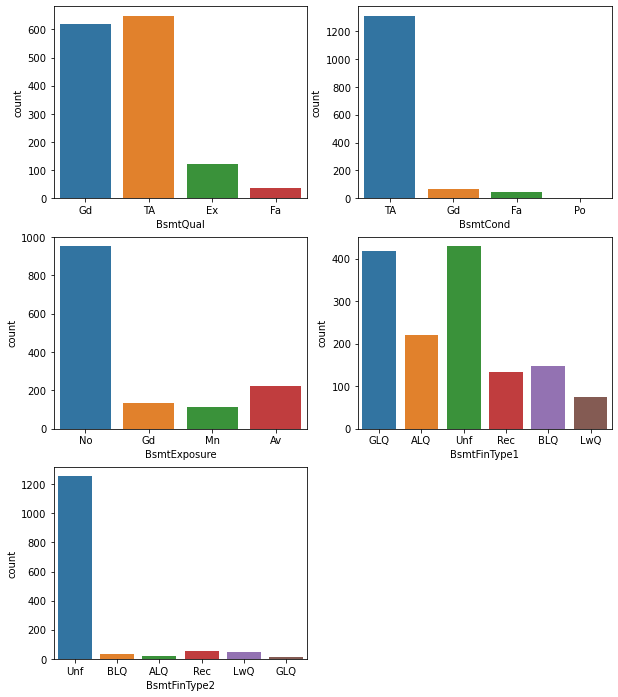

In [23]:
# Checking columns BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtType2
plt.figure(figsize=(10,12))
plt.subplot(3,2,1)
sns.countplot(df["BsmtQual"])
plt.subplot(3,2,2)
sns.countplot(df["BsmtCond"])
plt.subplot(3,2,3)
sns.countplot(df["BsmtExposure"])
plt.subplot(3,2,4)
sns.countplot(df["BsmtFinType1"])
plt.subplot(3,2,5)
sns.countplot(df["BsmtFinType2"])
plt.show()

In [24]:
#replacing null values with the values occuring max in the respective columns
df["BsmtQual"] = df["BsmtQual"].fillna("TA")
df["BsmtCond"] = df["BsmtCond"].fillna("TA")
df["BsmtExposure"] = df["BsmtExposure"].fillna("No")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("Unf")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("Unf")

**Checking for columns MasVnrType, MasVnrArea**

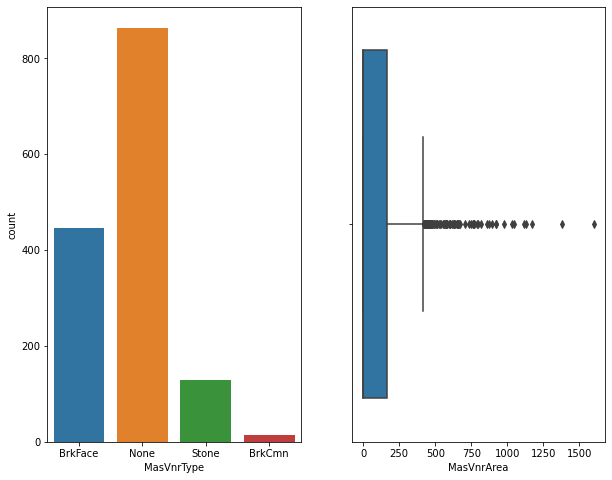

In [25]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
sns.countplot(df["MasVnrType"])
plt.subplot(1,2,2)
sns.boxplot(df["MasVnrArea"])
plt.show()

In [26]:
df["MasVnrArea"].value_counts().head()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64

In [27]:
#replacing null values with max occurence value
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna("0.0")

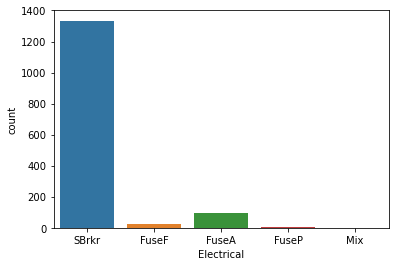

In [28]:
#for column Electrical
sns.countplot(df.Electrical)
plt.show()

In [29]:
#replacing value with most occured value "SBrkr"
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [30]:
#checking null values again
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

Now there are no null values in the data

In [31]:
#dropping ID column as it is a identifier
df=df.drop(['Id'], axis=1)

<Figure size 720x360 with 0 Axes>

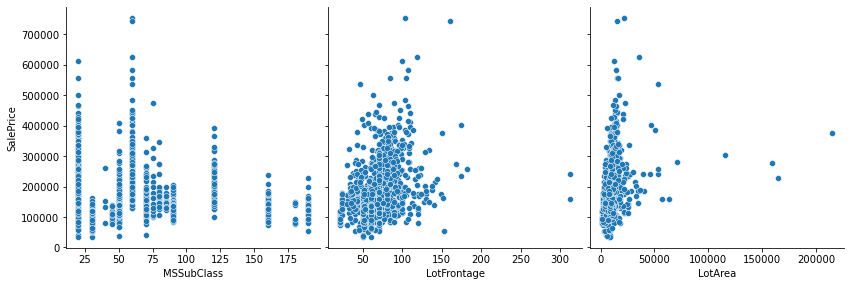

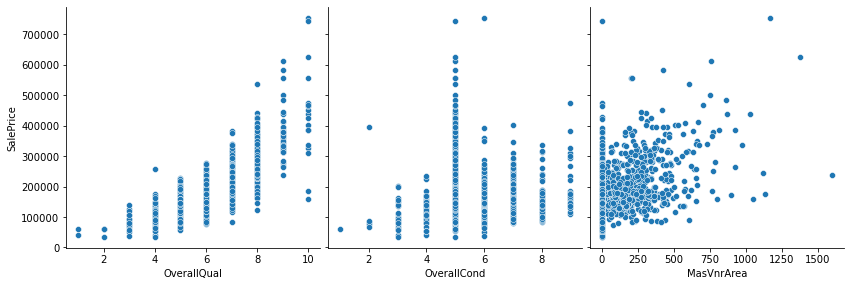

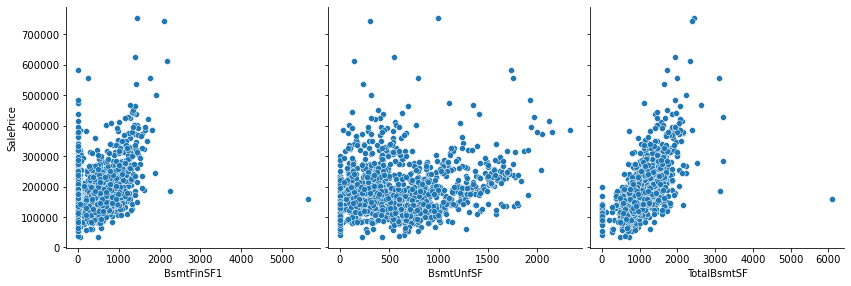

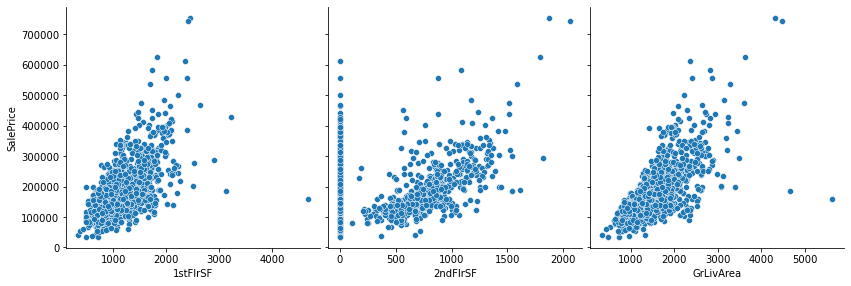

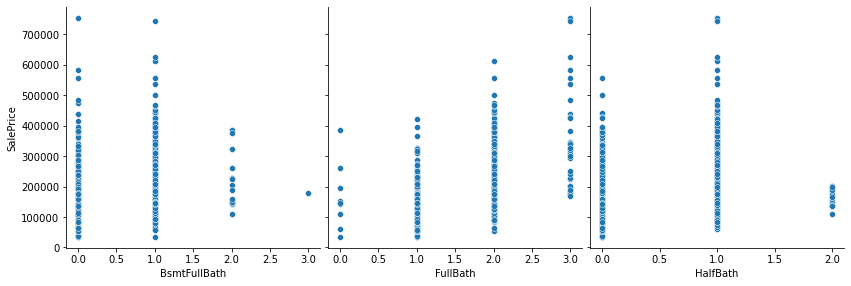

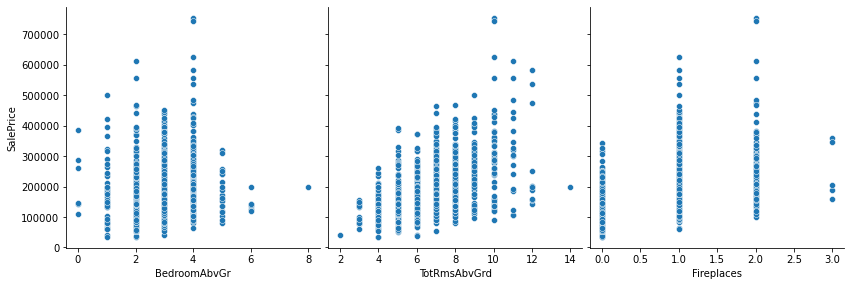

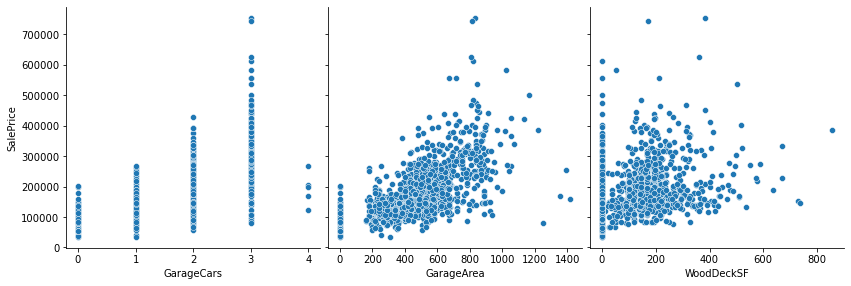

In [32]:
# plotting for numerical columns
plt.figure(figsize=(10,5))
sns.pairplot(df,x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df,x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df,x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df,x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df,x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df,x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df,x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()


**For columns 1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,TotalBsmtSF there is linear relationship with the SalePrice column**

##### Checking correlation of data

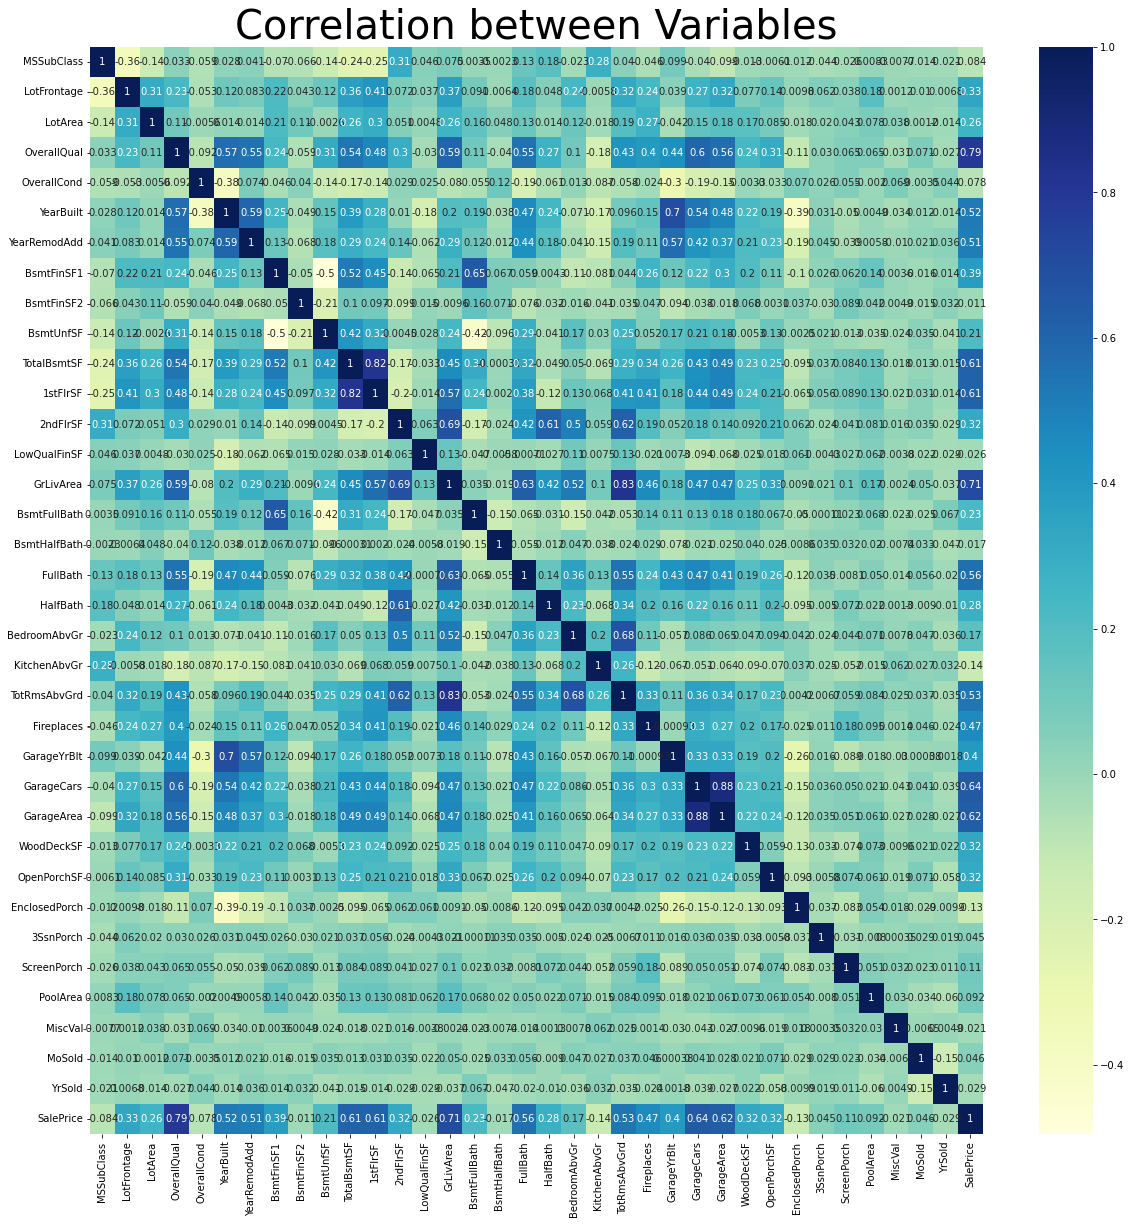

In [33]:
# correlation matrix
corr = df.corr()
# plotting heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.title("Correlation between Variables", fontsize=40)
plt.show()

**Above figure shows that the data is highly correlated**

SalePrice is highly correlated with OverallQual, GrLivArea,TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars, GarageArea


### Creating dummy variable

In [34]:
#creating dummy variable containingg categorical data
df_cat=df.select_dtypes(include=['object'])
df_cat.pop("MasVnrArea")
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,no_place,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [35]:
#creating dummy variables 
dummy = pd.get_dummies(df_cat, drop_first=True)
dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_place,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,

In [36]:
#dropping categorical column in the dataset
df.drop(df_cat, axis=1, inplace=True)
#concating the dummy and df dataset
df = pd.concat([df,dummy], axis=1)
df.shape

(1460, 238)

We now have 238 columns in the dataset

In [37]:
#running standard scaller 
scaler = StandardScaler()

In [38]:
#standardizing the values
df[["MSSubClass","OverallQual","OverallCond","LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = scaler.fit_transform(df[["MSSubClass","OverallQual","OverallCond","LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]] = scaler.fit_transform(df[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]])
df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]] = scaler.fit_transform(df[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])

In [39]:
#checking dataframe
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_no_place,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1,0.163779,-0.211454,0.912210,-0.951226,0.930592,0.311725,

In [40]:
#saving target variable to y
y=df.pop("SalePrice")
X=df

In [41]:
#split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y,train_size=0.7,test_size = 0.3, random_state=100)

In [42]:
#checking shape of train data set
X_train.shape

(1021, 237)

In [43]:
#checking shape of test data set
X_test.shape

(438, 237)

In [44]:
#adding the constants otherwise line will pass through origin
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [45]:
lr= sm.OLS(y_train, X_train_sm, family = sm.families.Binomial())
#fitting the residuals
res= lr.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     64.00
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        17:30:44   Log-Likelihood:                 70.351
No. Observations:                1021   AIC:                             317.3
Df Residuals:                     792   BIC:                             1446.
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -9.7559      0.833    -11.715      0.000     -11.390      -8.121
MSSubClass               -0.0235      0.049     -0.477      0.634      -0.120       0.073
LotFrontage               0.0264      0.014      1.896      0.058      -0.001       0.054
LotArea                   0.0884      0.015      5.899      0.000       0.059       0.118
OverallQual               0.1079      0.020      5.446      0.000       0.069       0.147
OverallCond               0.0797      0.014      5.678      0.000       0.052       0.107
YearBuilt                 0.1591      0.033      4.758      0.000       0.093       0.225
YearRemodAdd              0.0302      0.016      1.887      0.060      -0.001       0.062
MasVnrArea                0.0495      0.014      3.657      0.000       0.023       0.076
BsmtFinSF1                0.1024      0.014      7.502      0.000       0.076       0.129
BsmtFinSF2                0.0198      0.016      1.232      0.218      -0.012       0.051
BsmtUnfSF                -0.0048      0.011     -0.433      0.665      -0.026       0.017
TotalBsmtSF               0.1089      0.016      6.626      0.000       0.077       0.141
1stFlrSF                  0.1138      0.020      5.583      0.000       0.074       0.154
2ndFlrSF                  0.2274      0.023      9.810      0.000       0.182       0.273
LowQualFinSF             -0.0206      0.011     -1.803      0.072      -0.043       0.002
GrLivArea                 0.2707      0.017     15.668      0.000       0.237       0.305
BsmtFullBath              0.0091      0.014      0.666      0.506      -0.018       0.036
BsmtHalfBath             -0.0019      0.010     -0.194      0.846      -0.021       0.018
FullBath                  0.0047      0.017      0.278      0.781      -0.028       0.038
HalfBath                 -0.0496      0.030     -1.655      0.098      -0.108       0.009
BedroomAbvGr             -0.0391      0.016     -2.453      0.014      -0.070      -0.008
KitchenAbvGr             -0.0411      0.019     -2.142      0.033      -0.079      -0.003
TotRmsAbvGrd             -0.0116      0.022     -0.520      0.603      -0.055       0.032
Fireplaces                0.0306      0.023      1.340      0.181      -0.014       0.075
GarageYrBlt               0.0261      0.017      1.567      0.118      -0.007       0.059
GarageCars                0.0370      0.024      1.549      0.122      -0.010       0.084
GarageArea                0.0150      0.024      0.622      0.534      -0.032       0.062
WoodDeckSF                0.0141      0.010      1.392      0.164      -0.006       0.034
OpenPorchSF               0.0179      0.011      1.652      0.099      -0.003       0.039
EnclosedPorch            -0.0026      0.011     -0.242      0.809      -0.023       0.018
3SsnPorch              

In [46]:
#predicting values
y_train_pred = res.predict(X_train_sm)
y_test_pred = res.predict(X_test_sm)

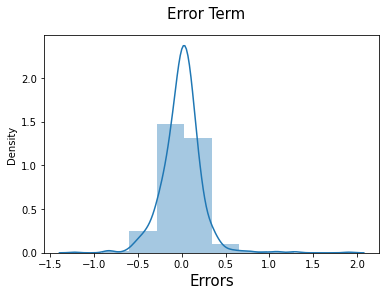

In [47]:
#calculating residual
residual = y_train - y_train_pred

#histogram of  error terms
fig = plt.figure()
sns.distplot(residual, bins = 10)
#plt tittle
fig.suptitle('Error Term', fontsize = 15) 
#x label
plt.xlabel('Errors', fontsize= 15)  
plt.show()

Error terms are normaly distributed 

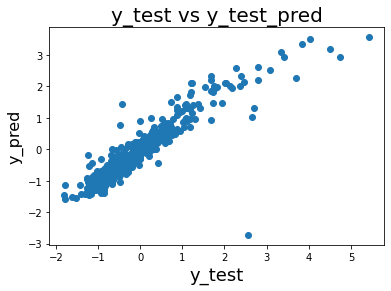

In [48]:
#plotting scatter plot for test and test predicted values
plt.scatter(y_test, y_test_pred)
#tittle of graph
plt.title('y_test vs y_test_pred', fontsize = 20) 
# x axis label 
plt.xlabel('y_test', fontsize = 18) 
# y axis label
plt.ylabel('y_pred', fontsize = 16)
plt.show()

### Ridge Regression

In [49]:
# List of Alphas to tune - if value too high it will lead to "Overfitting", if it is too low  it will not be able to handle overfitting
params = {'alpha' : [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                    7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}


#Initialising
ridge = Ridge()

#cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
#best Hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [51]:
# fitting Ridge model for alpha = 20
alpha = 20
ridge = Ridge(alpha=alpha)

#coefficients
ridge_model = ridge.fit(X_train, y_train)

print("Ridge Coefficients:", ridge.coef_)

Ridge Coefficients: [-9.04767880e-02 -3.02716393e-02  4.74992609e-02  1.99493859e-01
  6.69972244e-02  6.29417772e-02  2.79650248e-02  5.85915699e-02
 -4.73686678e-03  1.00280682e-02  1.05865007e-02  9.42561985e-03
  8.24175624e-02  1.64404525e-01 -1.32699422e-02  1.95979996e-01
  6.76849381e-02  9.48382212e-03  4.59915863e-02  1.90351940e-02
 -2.09388514e-02 -3.32552840e-02  2.95981598e-02  3.71308879e-02
  2.60073531e-02  1.10130669e-01 -1.49023806e-02  2.50807487e-02
 -8.54870877e-03  8.43371342e-03  1.75639749e-02  1.70998139e-02
 -5.56640886e-03 -1.76681264e-03 -8.03456354e-03 -1.44675152e-02
  4.12203882e-02  1.90451638e-02  6.00286160e-02 -3.16910952e-02
  4.66812520e-02  1.53045282e-02 -1.03051075e-01  5.85096079e-03
  9.45336048e-02  6.52683299e-02  1.31999168e-01 -2.19887318e-02
  9.13429161e-02 -7.53101212e-02 -1.43731987e-02 -1.33734718e-02
  6.97204707e-02 -1.46611123e-02 -5.88031736e-03 -3.65435844e-03
  2.21815557e-02  2.44370945e-02 -7.62384887e-02  1.65988689e-01
 -1.8

In [52]:
#checking parameter's of Ridge Regression
print(ridge.intercept_)
model_params_ridge = list(ridge.coef_)
model_params_ridge.insert(0, ridge.intercept_)
model_params_ridge = [round(x, 3) for x in model_params_ridge]
cols = X.columns
cols = cols.insert(0, 'constant')
sorted(list(zip(model_params_ridge, cols)), key=lambda x: abs(x[0]), reverse=True)

-0.11355589722246184


[(0.3, 'Neighborhood_NoRidge'),
 (-0.251, 'BsmtQual_Gd'),
 (0.237, 'Neighborhood_NridgHt'),
 (-0.21, 'KitchenQual_Gd'),
 (0.199, 'OverallQual'),
 (0.196, 'GrLivArea'),
 (-0.187, 'Neighborhood_Edwards'),
 (0.181, 'BsmtExposure_Gd'),
 (-0.176, 'KitchenQual_TA'),
 (-0.17, 'Condition2_PosN'),
 (0.17, 'RoofMatl_WdShngl'),
 (0.166, 'Neighborhood_Crawfor'),
 (0.164, '2ndFlrSF'),
 (-0.164, 'BsmtQual_TA'),
 (0.136, 'Condition1_Norm'),
 (0.132, 'LandContour_Lvl'),
 (0.12, 'Exterior1st_BrkFace'),
 (-0.119, 'Neighborhood_Mitchel'),
 (0.117, 'Neighborhood_Somerst'),
 (-0.114, 'constant'),
 (-0.114, 'BsmtExposure_No'),
 (0.11, 'GarageCars'),
 (-0.11, 'ExterQual_TA'),
 (-0.103, 'LotShape_IR3'),
 (0.1, 'Neighborhood_StoneBr'),
 (0.1, 'HouseStyle_1Story'),
 (-0.099, 'Neighborhood_Gilbert'),
 (0.096, 'Exterior2nd_ImStucc'),
 (0.095, 'LandContour_HLS'),
 (0.093, 'Functional_Typ'),
 (0.091, 'LotConfig_CulDSac'),
 (-0.09, 'MSSubClass'),
 (-0.09, 'Neighborhood_NAmes'),
 (-0.087, 'Exterior2nd_Wd Shng'),
 (0.

In [53]:
#Checking r2 score of train and test dataset
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

a=[]

#Train R2 score
train_r2_ridge = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 score:" + str(train_r2_ridge))
a.append(train_r2_ridge)

#Test R2 score
test_r2_ridge = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 score:" + str(test_r2_ridge))
a.append(test_r2_ridge)


Train r2 score:0.8846830175183199
Test r2 score:0.8688378418646683


***Ridge (alpha=20)	and R2 Train Score:0.8846830175183199, R2 Test Score:0.8688378418646683***

### Lasso Regression

In [54]:
#initializing lasso
lasso = Lasso()

#cross validation 
ml_cv = GridSearchCV(estimator = lasso,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs = 60,
                       cv = folds,
                       return_train_score = True,
                       verbose = 1)
#fitting the training model
ml_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=60,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(ml_cv.best_params_)

{'alpha': 0.001}


In [56]:
#taking best alpha value for lasso
alpha = 0.001

lasso = Lasso(alpha = alpha)

lasso_model = lasso.fit(X_train, y_train)

#printing coefficient
print(lasso.coef_)

[-8.69117591e-02 -2.44863946e-02  5.13272093e-02  1.66241196e-01
  6.79505205e-02  6.78646088e-02  2.62129484e-02  4.46660407e-02
 -0.00000000e+00  5.17652645e-03  9.64485729e-03  5.13117731e-04
  0.00000000e+00  7.74017474e-02 -2.66029244e-02  3.54855141e-01
  6.12962278e-02  7.55675939e-03  4.27127332e-02  0.00000000e+00
 -2.06399039e-02 -3.64474980e-02  2.84600543e-03  1.12339277e-02
  2.31296270e-02  1.11068539e-01 -3.45214372e-02  1.59157542e-02
  0.00000000e+00  5.99874671e-03  1.36905664e-02  1.46362174e-02
 -8.97948703e-03 -6.22337889e-04 -5.65738623e-03 -9.63967479e-03
  0.00000000e+00  0.00000000e+00  7.19570323e-02 -0.00000000e+00
  2.19150845e-02  0.00000000e+00 -2.61733571e-01  7.06906733e-03
  1.10036555e-01  1.15306029e-01  1.43980180e-01 -0.00000000e+00
  1.11806512e-01 -9.07186995e-02 -0.00000000e+00 -0.00000000e+00
  1.35399157e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  8.76815671e-03  3.15794397e-02  0.00000000e+00  2.91513759e-01
 -1.66026809e-01 -9.63693

In [57]:
#predicting using lasso
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

b=[]

#Train R2 score
train_r2_lasso = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_lasso))
b.append(train_r2_lasso)

#Test R2 score
test_r2_lasso = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_lasso))
b.append(test_r2_lasso)

Train r2 = 0.9064342411024804
Test r2 = 0.8563465968424706


In [58]:
#checking parameter's of Lasso Regression
model_params_lasso = list(lasso.coef_)
model_params_lasso.insert(0, lasso.intercept_)
model_params_lasso = [round(x, 3) for x in model_params_lasso]
cols = X.columns
cols = cols.insert(0, 'constant')
lasso_selected_features = []
for k, v in sorted(list(zip(model_params_lasso, cols)), key=lambda x:abs(x[0]), reverse=True)[1:131]:
    lasso_selected_features.append(v)
sorted(list(zip(model_params_lasso, cols)), key=lambda x: abs(x[0]), reverse=True)

[(-3.032, 'Condition2_PosN'),
 (0.937, 'RoofMatl_WdShngl'),
 (0.546, 'Neighborhood_NoRidge'),
 (0.361, 'Neighborhood_NridgHt'),
 (0.355, 'GrLivArea'),
 (-0.35, 'BsmtQual_Gd'),
 (-0.346, 'KitchenQual_Gd'),
 (-0.325, 'KitchenQual_TA'),
 (0.292, 'Neighborhood_Crawfor'),
 (-0.284, 'BsmtQual_TA'),
 (0.267, 'Neighborhood_Somerst'),
 (-0.262, 'LotShape_IR3'),
 (0.259, 'Neighborhood_StoneBr'),
 (0.243, 'BsmtExposure_Gd'),
 (0.241, 'RoofMatl_CompShg'),
 (-0.219, 'KitchenQual_Fa'),
 (0.211, 'Exterior1st_BrkFace'),
 (-0.193, 'BsmtQual_Fa'),
 (0.166, 'OverallQual'),
 (-0.166, 'Neighborhood_Edwards'),
 (0.164, 'Exterior2nd_ImStucc'),
 (0.144, 'LandContour_Lvl'),
 (-0.126, 'Exterior2nd_Wd Shng'),
 (-0.121, 'Neighborhood_Mitchel'),
 (-0.118, 'constant'),
 (-0.118, 'Exterior2nd_Stucco'),
 (0.117, 'Condition1_Norm'),
 (0.115, 'LandContour_Low'),
 (0.112, 'LotConfig_CulDSac'),
 (0.111, 'GarageCars'),
 (0.11, 'LandContour_HLS'),
 (-0.108, 'BsmtExposure_No'),
 (0.106, 'HouseStyle_1Story'),
 (0.106, 'Funct

***best Lasso alpga is 0.001
and R2 scrore for train data is 0.9064342411024804
,R2 scrore for train data is 0.8563465968424706***

------------------------------------------------------------------------------------------------------------------------------

## Subjctive question

#### Q1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [72]:
ridge_alpha_double = 40
lasso_alpha_double = 0.002

# Ridge Regression model
ridge_double = Ridge(alpha = ridge_alpha_double)
ridge_double_model = ridge_double.fit(X_train, y_train)

#Lasso Regression model
lasso_double = Lasso(alpha = lasso_alpha_double)
lasso_double_model = lasso_double.fit(X_train, y_train)

In [91]:
#Making Predictions using Ridge

y_train_pred = ridge_double.predict(X_train)
y_test_pred = ridge_double.predict(X_test)

metric_ridge_double = []

#Train R2 score
train_r2_ridge = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_ridge))
metric_ridge_double.append(train_r2_ridge)

#Test R2 score
test_r2_ridge = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_ridge))
metric_ridge_double.append(test_r2_ridge)    

Train r2 = 0.8733224535950143
Test r2 = 0.8660272636096509


In [90]:
# Lasso prediction

y_train_pred = lasso_double.predict(X_train)
y_test_pred = lasso_double.predict(X_test)

metric_lasso_double = []

#Trainset R2 score
train_r2_lasso = r2_score(y_true = y_train, y_pred = y_train_pred)
print("Train r2 = " + str(train_r2_lasso))
metric_lasso_double.append(train_r2_lasso)

#Testset R2 score
test_r2_lasso = r2_score(y_true = y_test, y_pred = y_test_pred)
print("Test r2 = " + str(test_r2_lasso))
metric_lasso_double.append(test_r2_lasso)

Train r2 = 0.8938316817294861
Test r2 = 0.8635862956225242


In [76]:
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0

# Calculating max coeff and most imp column of Ridge Model
for (coef,column) in zip(ridge_model.coef_, X_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column
# Calculating max coeff and most imp column of Ridge double value        
for (coef,column) in zip(ridge_double_model.coef_, X_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column
        
# Calculating max coeff and most imp column of Lasso Model        
for (coef,column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
        
# Calculating max coeff and most imp column of Lasso double value        
for (coef,column) in zip(lasso_double_model.coef_, X_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
        
print("Ridge max col =", ridge_max_col)
print("Ridge max coef =", ridge_max_coef)
print()

print("Ridge_double max col =", ridge_double_max_col)
print("Ridge_double max coef =", ridge_double_max_coef)
print()

print("Lasso max col =", lasso_max_col)
print("Lasso max coef =", lasso_max_coef)
print()

print("Lasso_double max col =", lasso_double_max_col)
print("Lasso_double max coef =", lasso_double_max_coef)
print()

Ridge max col = Neighborhood_NoRidge
Ridge max coef = 0.2996929317374142

Ridge_double max col = Neighborhood_NoRidge
Ridge_double max coef = 0.21362590514802876

Lasso max col = RoofMatl_WdShngl
Lasso max coef = 0.9371314350834653

Lasso_double max col = Neighborhood_NoRidge
Lasso_double max coef = 0.5461195806394026



#### Q3.After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [83]:
# Determining top_5 predictor in lasso model 
lasso_max_coef_list = []

for(coef, column) in zip(lasso_model.coef_, X_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

print(lasso_max_coef_list)

[-3.0316263143158166, -0.34978766821711627, -0.3456793626536944, -0.3248119530721446, -0.2844555797669195, -0.26173357053540813, -0.2187498820153851, -0.19258552463861783, -0.1660268091467629, -0.1263567617123418, -0.12070819571358936, -0.11810220112832902, -0.10836296858871891, -0.09123551566665236, -0.09071869953130124, -0.08691175910941186, -0.08250515691248156, -0.07532520898614133, -0.07028712352302921, -0.0695895324234134, -0.06312183263521849, -0.05772132621553776, -0.05705238288658022, -0.053399593296746366, -0.05102069487339367, -0.049741821284662126, -0.04657136956969141, -0.04203736545656187, -0.03697303860566019, -0.03644749795230295, -0.03452143716191496, -0.03443023797750136, -0.030884588953179987, -0.03000478051533722, -0.026602924392405306, -0.02448639462503105, -0.02431106179263605, -0.023518159482168507, -0.02192560340997254, -0.02063990390442068, -0.02025020949857259, -0.01762278747488108, -0.017621911382871346, -0.017051154190621996, -0.014385799648519012, -0.014292

In [86]:
for (coef, column) in zip(lasso_model.coef_, X_train.columns):
    print("{} ;{}".format(column,coef))

MSSubClass ;-0.08691175910941186
LotFrontage ;-0.02448639462503105
LotArea ;0.05132720931450117
OverallQual ;0.1662411964284651
OverallCond ;0.06795052054249293
YearBuilt ;0.06786460883727076
YearRemodAdd ;0.026212948442807624
MasVnrArea ;0.04466604065046427
BsmtFinSF1 ;-0.0
BsmtFinSF2 ;0.0051765264487911725
BsmtUnfSF ;0.009644857287548847
TotalBsmtSF ;0.0005131177308452009
1stFlrSF ;0.0
2ndFlrSF ;0.07740174744454711
LowQualFinSF ;-0.026602924392405306
GrLivArea ;0.3548551405484282
BsmtFullBath ;0.061296227809987815
BsmtHalfBath ;0.007556759394932787
FullBath ;0.04271273320684516
HalfBath ;0.0
BedroomAbvGr ;-0.02063990390442068
KitchenAbvGr ;-0.03644749795230295
TotRmsAbvGrd ;0.00284600542792151
Fireplaces ;0.011233927664544856
GarageYrBlt ;0.023129626973867813
GarageCars ;0.1110685389044496
GarageArea ;-0.03452143716191496
WoodDeckSF ;0.0159157542059622
OpenPorchSF ;0.0
EnclosedPorch ;0.005998746707679088
3SsnPorch ;0.013690566423602685
ScreenPorch ;0.014636217350704032
PoolArea ;-0.0

In [87]:
# Drop the above columns from X_train
X_train_excluding_top_5 = X_train.drop(['RoofMatl_WdShngl', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
                                         'GrLivArea', 'Neighborhood_Crawfor'], axis =1)

# Lasso Regression model
lasso_excluding_top_5 = Lasso(alpha = 0.001)
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(X_train_excluding_top_5, y_train)

In [88]:
# Determining top 5 Predictors
lasso_max_coef_excluding_top_5_list = []

for (coef, column) in zip(lasso_excluding_top_5_model.coef_, X_train_excluding_top_5.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)

lasso_max_coef_excluding_top_5_list.sort()
print(lasso_max_coef_excluding_top_5_list)

[-3.358477515008634, -0.370677007158998, -0.3476621905370318, -0.3423552641303938, -0.3229306730880483, -0.3134159913002607, -0.30351982638617886, -0.3000432194669911, -0.2914764398566703, -0.23846797499856026, -0.23253643910153535, -0.22266840127376303, -0.21595975349237231, -0.20692172503546322, -0.20086939984237703, -0.17477003747464867, -0.1713987961733355, -0.13995860157034262, -0.11249614421595985, -0.10517419363254599, -0.10105270936259503, -0.09932147314131955, -0.09904696914189755, -0.09648397198241665, -0.091534212317013, -0.08769237603362047, -0.08654297195130291, -0.08258890301751966, -0.07530642790727024, -0.074335875188066, -0.07358188982358169, -0.06738747534513097, -0.06369440718475836, -0.05814110541402734, -0.048520669813187506, -0.04432905983422083, -0.03623928606855106, -0.03551057128494955, -0.029066180846951718, -0.02838684046719706, -0.024793990012334028, -0.02413429013841125, -0.023754603885356, -0.022619744539291605, -0.022057941365161697, -0.021166517836359977

In [89]:
for (coef, column) in zip(lasso_excluding_top_5_model.coef_, X_train_excluding_top_5.columns):
    print("{};{}". format(column, coef))

MSSubClass;-0.091534212317013
LotFrontage;-0.020961342667547404
LotArea;0.0641571678885042
OverallQual;0.1860538401120145
OverallCond;0.06298163298075608
YearBuilt;0.08249702334638252
YearRemodAdd;0.02753660072965676
MasVnrArea;0.06705643852824539
BsmtFinSF1;-0.0
BsmtFinSF2;-0.0
BsmtUnfSF;0.0060833831546026436
TotalBsmtSF;0.0
1stFlrSF;0.2738980239370158
2ndFlrSF;0.4020045225229782
LowQualFinSF;0.0014482330995894954
BsmtFullBath;0.06346328324315964
BsmtHalfBath;0.005185855065830777
FullBath;0.03657978164814389
HalfBath;-0.0
BedroomAbvGr;-0.017136310808404248
KitchenAbvGr;-0.03551057128494955
TotRmsAbvGrd;-0.002211555711750421
Fireplaces;0.0
GarageYrBlt;0.026387719225793395
GarageCars;0.12116173814048278
GarageArea;-0.03623928606855106
WoodDeckSF;0.016779986842873743
OpenPorchSF;-0.00292745102224569
EnclosedPorch;0.0047945296736450855
3SsnPorch;0.012200004267048847
ScreenPorch;0.010165865463260145
PoolArea;-0.017627774788561458
MiscVal;-0.000775817506418382
MoSold;-0.003979057999044792
Y